### Q1

Optimise the following function using torch autograd and gradient descent, f(θ) = (θ₀ - 2)² + (θ₁ - 3)². In addition to finding the optima, you need to show the convergence plots. [0.5 marks]

In [1]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import torch
import torch.distributions as dist

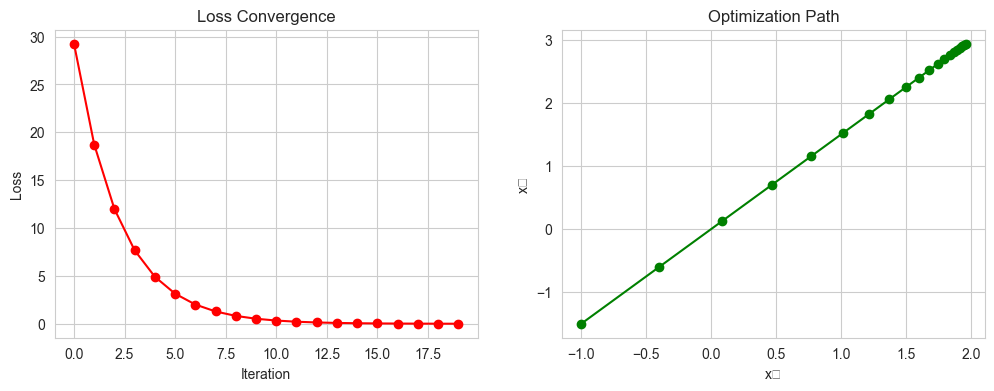

In [3]:
# Defining the function to be optimized
def loss_fun(x):
    return (x[0]-2)**2 + (x[1]-3)**2

# The varaiable tensor, whose operations are to be stored, (initial value set to be (-1,-1.5))
x = torch.tensor([-1.0, -1.5], requires_grad=True)

# Gradient Descent Hyperparameters
num_iterations = 20
learning_rate = 0.1

xs = []
losses = []

# Gradient Descent
for i in range(num_iterations):
    loss = loss_fun(x)
    # We want to calculate the gradient of loss scalar with respect to all tensors with requires_grad=True.
    loss.backward()

    xs.append(x.detach().numpy().copy()) # Cannot, convert a grad tensor to numpy directly
    losses.append(loss.item())           # Gives the direct value

    # Gradient Descent Step, Could have use torch.no_grad() as well
    x.data = x.data - learning_rate * x.grad

    # Manually zero the gradients after updating weights, (otherwise they accumulate)
    x.grad.zero_()

# Plotting the loss curve

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(losses, marker='o', color = 'red')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Convergence')

# Plotting the path taken by theta during optimization
ax[1].plot([x[0] for x in xs], [x[1] for x in xs], marker='o', color = "green")
ax[1].set_xlabel('x₀')
ax[1].set_ylabel('x₁')
ax[1].set_title('Optimization Path')
plt.show()

In [3]:
print("Optima: ",x)
print("Final Loss; ", "{:.5f}".format(loss.item()))

Optima:  tensor([1.9654, 2.9481], requires_grad=True)
Final Loss;  0.00607


TODO: Make a 2-D contour plot with the convergence points (can also add a slider for iterations or lr)

### Q2

Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0.

a) Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. [1 mark]

b) Find the MLE parameters for the loc and scale using gradient descent. Plot convergence plot as well. [1 mark]

c) Redo the above question but learn log(scale) instead of scale and then finally transform to learn scale. What can you conclude? Why is this transformation useful? [0.5 mark]

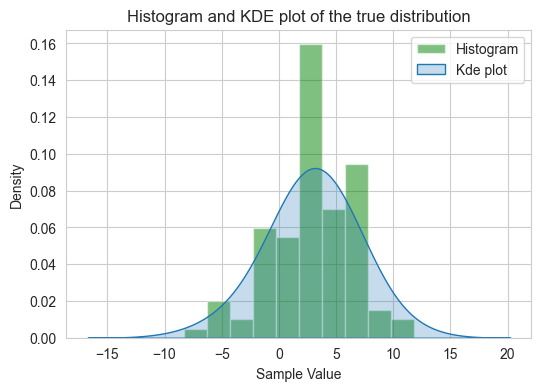

In [32]:
import seaborn as sns
import torch.distributions as dist
torch.manual_seed(17)

# Generating data from a univariate Normal Distribution
true_loc = 2.0
true_scale = 4.0

true_dist = dist.Normal(true_loc, true_scale)
true_samples = true_dist.sample((100,))
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(true_samples.numpy(),density=True, color = "green", alpha = 0.5, label = "Histogram")
sns.kdeplot(true_samples.numpy(), bw_adjust=2.0, fill=True, ax=ax, label = "Kde plot")
ax.set_title("Histogram and KDE plot of the true distribution")
ax.set_xlabel("Sample Value")
ax.legend()
plt.show()

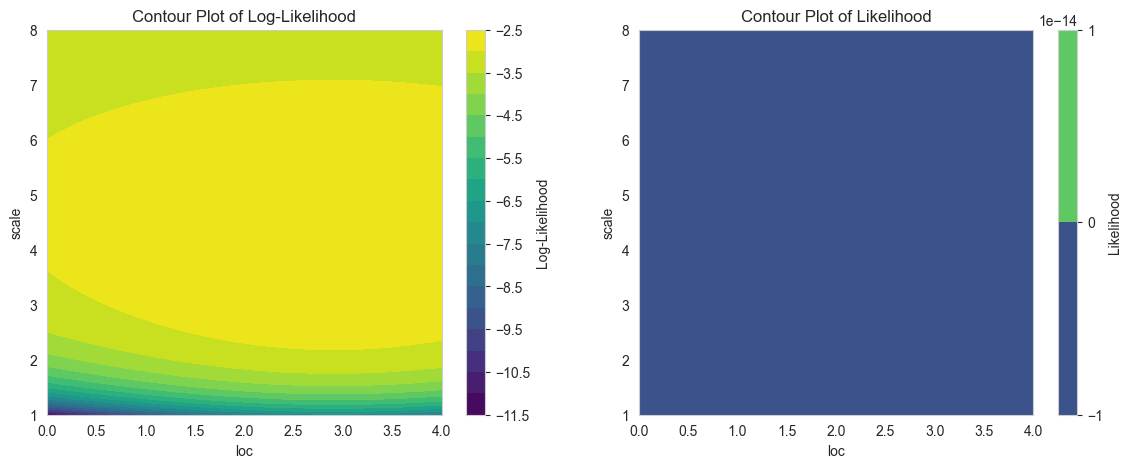

In [33]:
# Likelihood function for normally distributed data
def likelihood(data, loc, scale):
    dist = torch.distributions.Normal(loc, scale)
    return dist.log_prob(data).sum().exp()

def log_likelihood(data, loc, scale):
    dist = torch.distributions.Normal(loc, scale)
    return dist.log_prob(data).mean()

# Creating a grid of loc and scale values
loc_range = torch.linspace(0, 4, 100)
scale_range = torch.linspace(1.0, 8, 100)
loc_grid, scale_grid = torch.meshgrid(loc_range, scale_range)

# Calculate the log-likelihood and likelihood values on the grid
log_likelihood_grid = torch.zeros_like(loc_grid)
likelihood_grid = torch.zeros_like(loc_grid)
for i in range(len(loc_range)):
    for j in range(len(scale_range)):
        log_likelihood_grid[i, j] = log_likelihood(true_samples, loc_grid[i, j], scale_grid[i, j])
        likelihood_grid[i, j] = likelihood(true_samples, loc_grid[i, j], scale_grid[i, j])


# Plot the contour plot of the log-likelihood
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
contour = ax[0].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
mean_contour = ax[1].contourf(loc_grid, scale_grid, likelihood_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='Log-Likelihood')
plt.colorbar(mean_contour, label='Likelihood')
ax[0].set_xlabel('loc'); ax[1].set_xlabel('loc')
ax[0].set_ylabel('scale'); ax[1].set_ylabel('scale')
ax[0].set_title('Contour Plot of Log-Likelihood')
ax[1].set_title('Contour Plot of Likelihood')
plt.show()

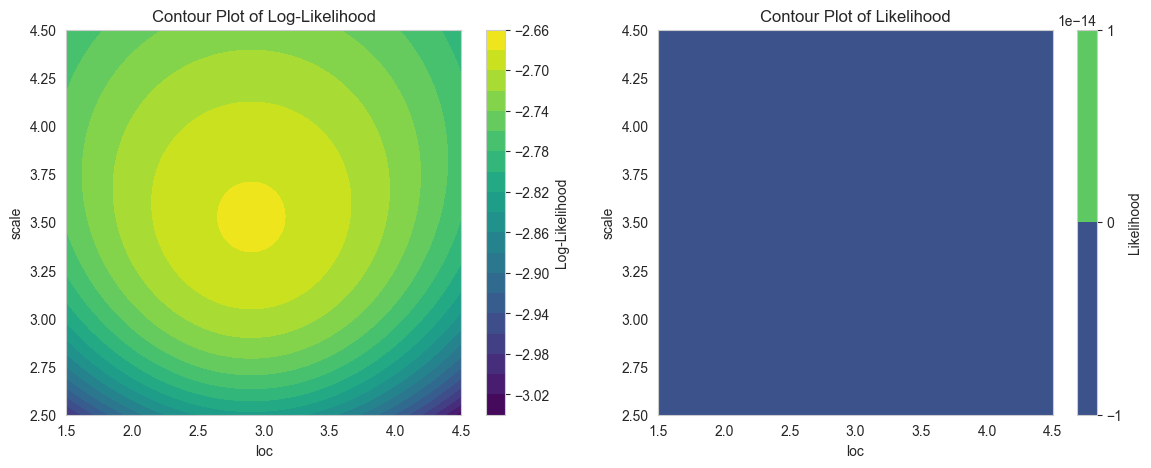

In [34]:
loc_range = torch.linspace(1.5, 4.5, 100)
scale_range = torch.linspace(2.5, 4.5, 100)
loc_grid, scale_grid = torch.meshgrid(loc_range, scale_range)

# Calculate the log-likelihood and likelihood values on the grid
log_likelihood_grid = torch.zeros_like(loc_grid)
likelihood_grid = torch.zeros_like(loc_grid)
for i in range(len(loc_range)):
    for j in range(len(scale_range)):
        log_likelihood_grid[i, j] = log_likelihood(true_samples, loc_grid[i, j], scale_grid[i, j])
        likelihood_grid[i, j] = likelihood(true_samples, loc_grid[i, j], scale_grid[i, j])

# Plot the contour plot of the log-likelihood
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
contour = ax[0].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
mean_contour = ax[1].contourf(loc_grid, scale_grid, likelihood_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='Log-Likelihood')
plt.colorbar(mean_contour, label='Likelihood')
ax[0].set_xlabel('loc'); ax[1].set_xlabel('loc')
ax[0].set_ylabel('scale'); ax[1].set_ylabel('scale')
ax[0].set_title('Contour Plot of Log-Likelihood')
ax[1].set_title('Contour Plot of Likelihood')
plt.show()

We used a learing rate of 0.1 initially but the loss was not decreasing. So we reduced the learning rate to 0.01 and the loss started decreasing. We also tried with 0.001 but the loss was decreasing very slowly. So we decided to go with 0.01 as the learning rate.

We used a learing rate fo 0.1 initially, but the parameter has a big jump (as the inital point (0.0, 0.5) is of high gradient), then it moved so far away that the gradients dropped to zero.

So, we reduced the learining rate to 0.005, and the parameter moved slowly, and the loss decreased, but it was not converging to the expected value, as the gradients had grown very small (at high scales (>3), the log_likelihood becomes very similar). Thus the convergence became very slow.

One way to solve this is to use multiple starting points, but it still does not mitigate the problem of slow convergence due to low values of gradients.

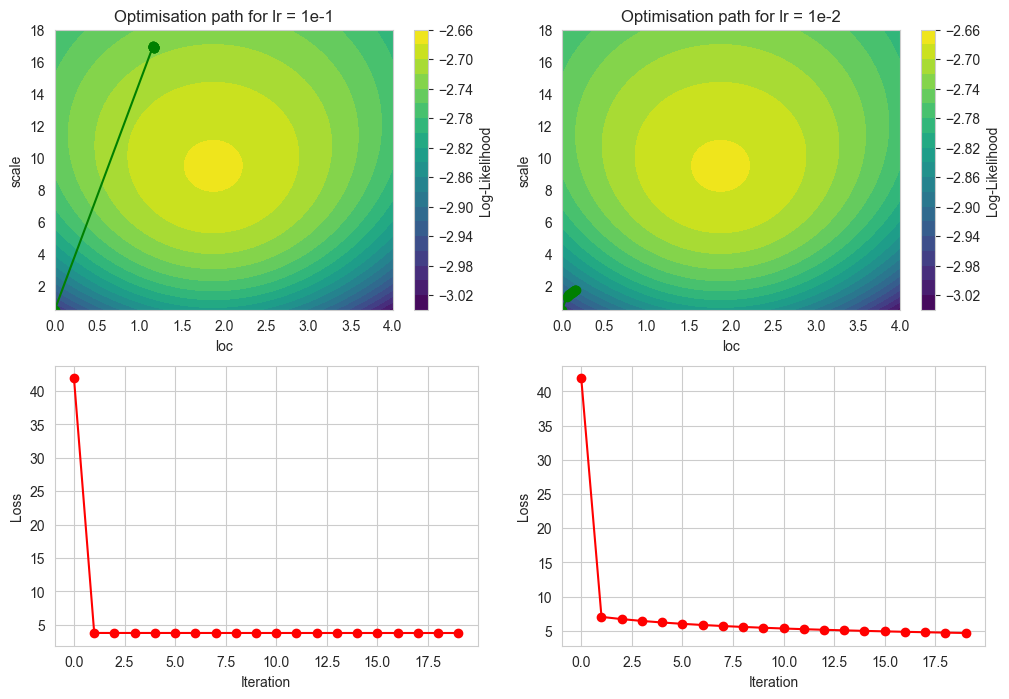

In [35]:
# Defining the function to be optimized
data = true_samples
def loss_fun(x):
    dist = torch.distributions.Normal(loc = x[0], scale = x[1])
    return -dist.log_prob(data).mean()

# The varaiable tensor, whose operations are to be stored, (initial value set to be (-1,-1.5))
x = torch.tensor([0.0, 0.5])

def optimiser(loss_fun, x_init, learning_rate, num_iterations):
    xs = []
    losses = []
    x = x_init.clone().requires_grad_(True)
    for i in range(num_iterations):
        loss = loss_fun(x)
        loss.backward()
        xs.append(x.detach().numpy().copy())
        losses.append(loss.item())
        x.data = x.data - learning_rate * x.grad
        x.grad.zero_()
    return xs, losses

xs, losses = optimiser(loss_fun, x, learning_rate = 1e-1, num_iterations = 20)
xs2, losses2 = optimiser(loss_fun, x, learning_rate = 5e-3, num_iterations = 20)

loc_range = torch.linspace(0, 4, 100)
scale_range = torch.linspace(0.5, 18, 100)
loc_grid, scale_grid = torch.meshgrid(loc_range, scale_range)

# Plotting the loss curve
fig, ax = plt.subplots(2,2, figsize=(12,8))

contour = ax[0,0].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
contour2 = ax[0,1].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='Log-Likelihood')
plt.colorbar(contour2, label='Log-Likelihood')

# Plotting the path taken by theta during optimization
ax[0,0].plot([x[0] for x in xs], [x[1] for x in xs], marker='o', color = "green")
ax[0,1].plot([x[0] for x in xs2], [x[1] for x in xs2], marker='o', color = "red")
ax[0,0].set_xlabel('loc'); ax[0,1].set_xlabel('loc')
ax[0,0].set_ylabel('scale'); ax[0,1].set_ylabel('scale')
ax[0,0].set_title('Optimisation path for lr = 1e-1'); ax[0,1].set_title('Optimisation path for lr = 5e-3')

# Plotting the loss curve
ax[1,0].plot(losses, marker='o', color = "red")
ax[1,0].set_xlabel('Iteration')
ax[1,0].set_ylabel('Loss')
ax[1,1].plot(losses2, marker='o', color = "red")
ax[1,1].set_xlabel('Iteration')
ax[1,1].set_ylabel('Loss')

plt.show()

In [12]:
# Using Multiple learning rates and 20 iterations
lrs = [1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4]
num_iters = [20, 20, 20, 20, 40, 40, 40, 40, 80, 80]
dic = {}

for lr, num_iter in zip(lrs, num_iters):
    x = torch.tensor([0.0, 0.5])
    xs, losses = optimiser(loss_fun, x, learning_rate = lr, num_iterations = num_iter)
    dic[lr] = (xs[-1][0], xs[-1][1], losses[-1])

results = pd.DataFrame.from_dict(dic, orient='index', columns=['Opt loc','Opt scale', 'loss'])
results

,Opt loc,Opt scale,loss
0.1000,1.173366,16.866873,3.771341
0.0500,0.608730,8.654540,3.194958
0.0200,0.298061,3.825205,2.916326
0.0100,0.212867,2.377896,3.522079
0.0050,0.239484,2.003952,4.041936
0.0020,0.157784,1.580810,5.366981
0.0010,0.109147,1.337221,6.861138
0.0005,0.073445,1.133616,8.986595
0.0002,0.064696,1.074566,9.851474
0.0001,0.041962,0.916310,13.094335


In [16]:
# Using Multiple learning rates and 20 iterations
def sp_loss_fun(x):
    dist = torch.distributions.Normal(loc = x[0], scale = x[1].exp())
    return -dist.log_prob(data).mean()

lrs = [1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4]
num_iters = [20, 20, 20, 20, 40, 40, 40, 40, 80, 80]
dic = {}

for lr, num_iter in zip(lrs, num_iters):
    sp_x = torch.tensor([0.0, -1])
    xs, losses = optimiser(sp_loss_fun, sp_x, learning_rate = lr, num_iterations = num_iter)
    dic[lr] = (xs[-1][0], np.exp(xs[-1][1]), losses[-1])

results = pd.DataFrame.from_dict(dic, orient='index', columns=['Opt loc','Opt scale', 'loss'])
results

,Opt loc,Opt scale,loss
0.1000,2.147324,266905.750000,13.413589
0.0500,1.073670,313.372681,6.666412
0.0200,0.447664,6.266440,2.988852
0.0100,0.309108,2.832160,3.152663
0.0050,0.297083,2.603376,3.291888
0.0020,0.227660,1.763764,4.630698
0.0010,0.180205,1.298427,7.058069
0.0005,0.136306,0.963017,11.696827
0.0002,0.123135,0.878784,13.825399
0.0001,0.085828,0.676529,22.751589


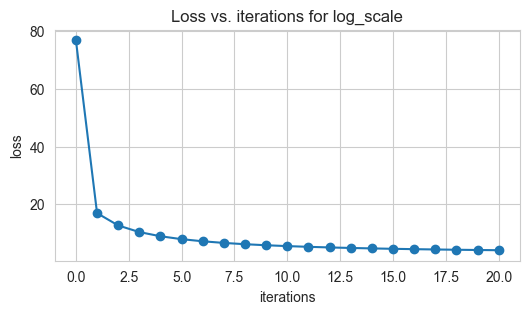

In [36]:
xs, losses = optimiser(sp_loss_fun, sp_x, learning_rate = 0.0050, num_iterations = 21)
fig, ax = plt.subplots( figsize = (6, 3))
ax.plot(losses, marker = "o")
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('Loss vs. iterations for log_scale')
plt.show()

Why does optimising scale on logarithmic scale help? In this particular function it is because the scale factor varies in a logarithmic scale rather than on a linear scale. Evident by the contour plotof the function and its formulae.

$$
logloss = \sum_{i=1}^{n} -log(\sigma \sqrt{2\pi}) + \frac{(y_i - \mu)^2}{2\sigma^2}
$$

The logarithmic scale for the scale parameter helps to make it linear .

### Q4

Analytically derive the MLE for exponential distribution. Generate some data (1000 data points) using some fixed parameter values and see if you can recover the analytical parameters using gradient descent based solution for obtaining MLE. [1 mark]

### A4:

The probability density function of exponential distribution is given by:

$$f(x) = \lambda e^{-\lambda x}$$

The likelihood function is given by:

$$L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i}$$

$$L(\lambda) = \lambda^n e^{-\lambda \sum_{i=1}^{n} x_i}$$

$$\ln L(\lambda) = n \ln \lambda - \lambda \sum_{i=1}^{n} x_i$$

$$\frac{\partial \ln L(\lambda)}{\partial \lambda} = \frac{n}{\lambda} - \sum_{i=1}^{n} x_i$$

$$\frac{\partial^2 \ln L(\lambda)}{\partial \lambda^2} = -\frac{n}{\lambda^2}$$

The MLE is obtained by equating the first derivative to zero:

$$\frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0$$

$$\lambda = \frac{n}{\sum_{i=1}^{n} x_i}$$

The second derivative is negative, so the MLE is a maximum.

In the following code, we generate 1000 data points from an exponential distribution with $\lambda = 0.5$ and then use gradient descent to find the MLE of $\lambda$.


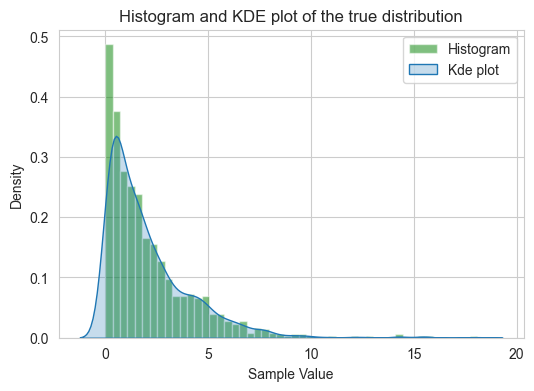

In [53]:
import torch.distributions as dist
torch.manual_seed(17)

# Generating data from a exponential Distribution
true_lamb = 0.5

true_dist = dist.Exponential(true_lamb)
true_samples = true_dist.sample((1000,))
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(true_samples.numpy(),density=True, color = "green", alpha = 0.5, bins = 50, label = "Histogram")
sns.kdeplot(true_samples.numpy(), bw_adjust=0.75, fill=True, ax=ax, label = "Kde plot")
ax.set_title("Histogram and KDE plot of the true distribution")
ax.set_xlabel("Sample Value")
ax.legend()
plt.show()

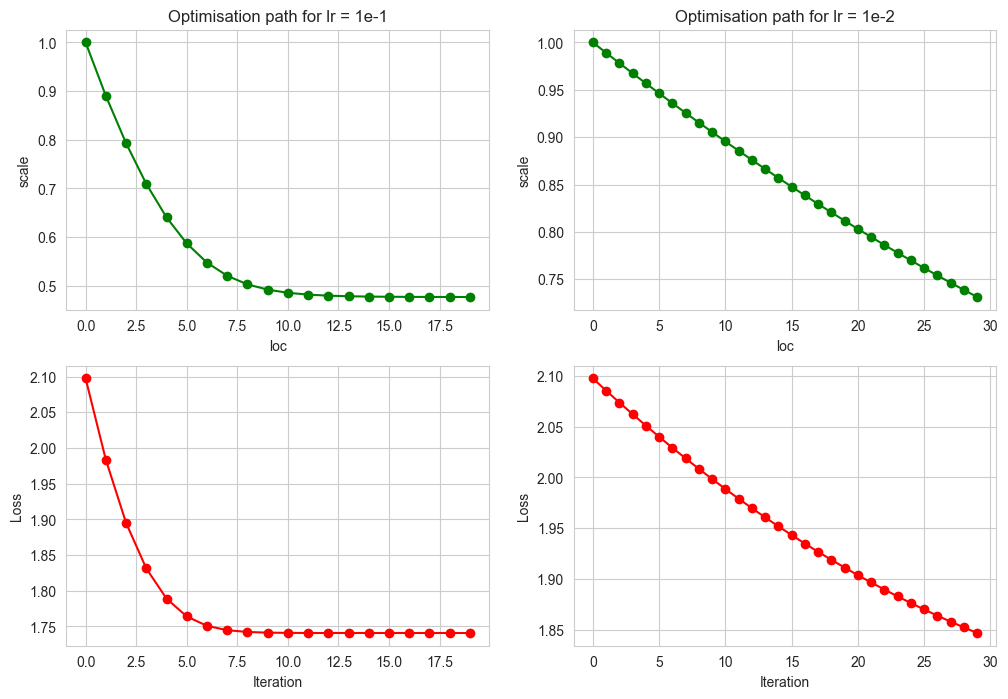

In [60]:
# Defining the function to be optimized
data = true_samples
def loss_fun(x):
    distr = dist.Exponential(x)
    return -distr.log_prob(data).mean()

# The varaiable tensor, whose operations are to be stored, (initial value set to be (-1,-1.5))
x = torch.tensor([1.0])

def optimiser(loss_fun, x_init, learning_rate, num_iterations):
    xs = []
    losses = []
    x = x_init.clone().requires_grad_(True)
    for i in range(num_iterations):
        loss = loss_fun(x)
        loss.backward()
        xs.append(x.detach().numpy().copy())
        losses.append(loss.item())
        x.data = x.data - learning_rate * x.grad
        x.grad.zero_()
    return xs, losses

xs, losses = optimiser(loss_fun, x, learning_rate = 1e-1, num_iterations = 20)
xs2, losses2 = optimiser(loss_fun, x, learning_rate = 1e-2, num_iterations = 30)

loc_range = torch.linspace(0, 4, 100)
scale_range = torch.linspace(0.5, 18, 100)
loc_grid, scale_grid = torch.meshgrid(loc_range, scale_range)

# Plotting the loss curve
fig, ax = plt.subplots(2,2, figsize=(12,8))

# contour = ax[0,0].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
# contour2 = ax[0,1].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
# plt.colorbar(contour, label='Log-Likelihood')
# plt.colorbar(contour2, label='Log-Likelihood')

# Plotting the path taken by theta during optimization
ax[0,0].plot(xs, marker='o', color = "green")
ax[0,1].plot(xs2, marker='o', color = "green")
ax[0,0].set_xlabel('loc'); ax[0,1].set_xlabel('loc')
ax[0,0].set_ylabel('scale'); ax[0,1].set_ylabel('scale')
ax[0,0].set_title('Optimisation path for lr = 1e-1'); ax[0,1].set_title('Optimisation path for lr = 1e-2')

# Plotting the loss curve
ax[1,0].plot(losses, marker='o', color = "red")
ax[1,0].set_xlabel('Iteration')
ax[1,0].set_ylabel('Loss')
ax[1,1].plot(losses2, marker='o', color = "red")
ax[1,1].set_xlabel('Iteration')
ax[1,1].set_ylabel('Loss')

plt.show()

In [68]:
# Analytically Calculated Lambda:-
print("Analytically Calculated Lambda:-", "{:.5f}".format(1/np.mean(true_samples.numpy())) )

Analytically Calculated Lambda:- 0.47678


In [66]:
# Using Multiple learning rates and 20 iterations
lrs = [1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3]
num_iters = [20, 20, 20, 20, 40, 40]
dic = {}

for lr, num_iter in zip(lrs, num_iters):
    x = torch.tensor([1.0])
    xs, losses = optimiser(loss_fun, x, learning_rate = lr, num_iterations = num_iter)
    dic[lr] = (xs[-1].item(), losses[-1])

results = pd.DataFrame.from_dict(dic, orient='index', columns=['Opt lamb','loss'])
results

,Opt lamb,loss
0.100,0.476827,1.740704
0.050,0.493872,1.741331
0.020,0.668664,1.804937
0.010,0.811700,1.911093
0.005,0.807884,1.907801
0.002,0.917757,2.010736


### Q5

Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0. Now, create datasets of size 10, 20, 50, 100, 500, 1000, 5000, 10000. We will use a different random seed to create ten different datasets for each of these sizes. For each of these datasets, find the MLE parameters for the loc and scale using gradient descent. Plot the estimates of loc and scale as a function of the dataset size. What can you conclude? [1 mark]